<a href="https://colab.research.google.com/github/Riochin/Zerokara-Deep-Learning/blob/main/3_4_Three_layer_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 3層ニューラルネットワークの実装

## 3.4.2 各層における信号伝達の実装

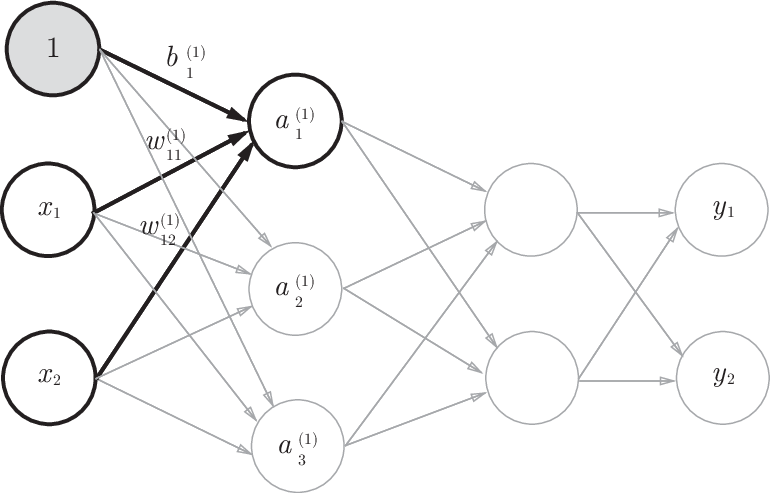

A = XW + B

- A = (a1,a2,a3)
- X = (x1,x2)
- B = (b1,b2,b3)
- W = ([w11,w21,w31],[w12,w22,w32])

In [1]:
import numpy as np

x = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape) # (2,3)
print(x.shape)  # (2, )
print(B1.shape) # (3, )

A1 = np.dot(x,W1) + B1

(2, 3)
(2,)
(3,)


#### シグモイド関数

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### 入力層から第1層への信号の伝達

In [4]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 第1層から第2層への信号の伝達
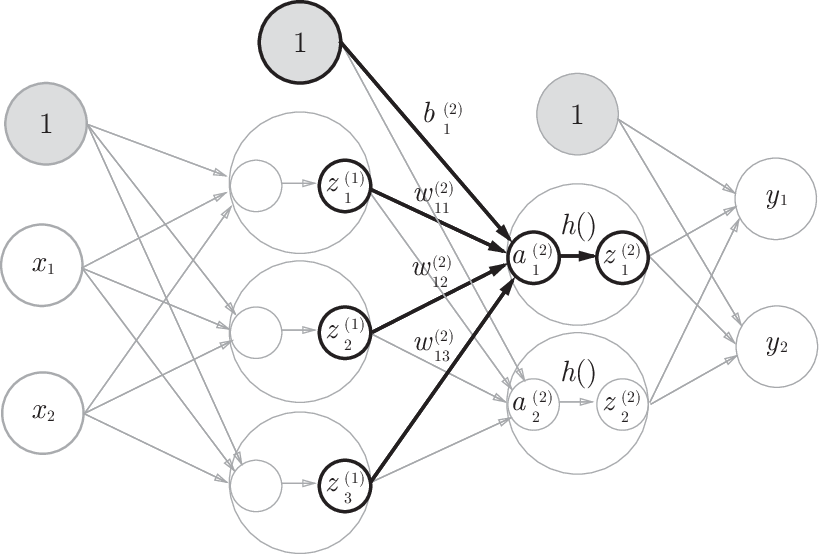

In [6]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3,2)
print(B2.shape) # (2,)

# sigmoidで活性化
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


#### 恒等関数の定義
... 入力をそのまま出力する関数（なくても良い）

In [8]:
def identity_function(x):
  return x

### 第2層から出力層への信号の伝達

In [10]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # Y = A3でも同じ

print(Y)

[0.31682708 0.69627909]


## 3.4.3 実装のまとめ

In [11]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
